In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import scipy.stats as stats
%matplotlib inline
import keras 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.activations import relu, softmax
import cv2
import keras.applications.imagenet_utils as imutils
import sklearn


In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

df_train['image_id'] = [i for i in df_train['image_id']]
df_test['image_id'] = df_test['image_id'] +'.jpg'



In [3]:
print(df_train.head())
print(df_test.head())

  image_id  healthy  multiple_diseases  rust  scab
0  Train_0        0                  0     0     1
1  Train_1        0                  1     0     0
2  Train_2        1                  0     0     0
3  Train_3        0                  0     1     0
4  Train_4        1                  0     0     0
     image_id
0  Test_0.jpg
1  Test_1.jpg
2  Test_2.jpg
3  Test_3.jpg
4  Test_4.jpg


In [4]:
print(df_train.info())
print(df_test.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1821 entries, 0 to 1820
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   image_id           1821 non-null   object
 1   healthy            1821 non-null   int64 
 2   multiple_diseases  1821 non-null   int64 
 3   rust               1821 non-null   int64 
 4   scab               1821 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 71.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1821 entries, 0 to 1820
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   image_id  1821 non-null   object
dtypes: object(1)
memory usage: 14.4+ KB
None


In [5]:

directory = 'images/'
img = []

for files in os.listdir(directory):
    if files.startswith('Train'):
        image = cv2.imread(directory+files)
        res = cv2.resize(image, (256,256))
        img.append(res)
    
img = np.array(img)
img.shape

(1821, 256, 256, 3)

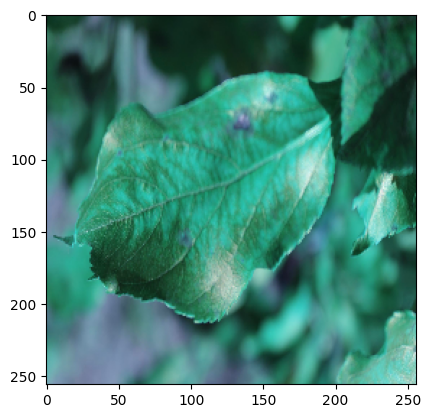

In [6]:
for i in range(0,1):
    plt.imshow(img[i])
    plt.show()

In [7]:
train_labels = np.float32(df_train.loc[:,'healthy':'scab'].values)
train_labels

array([[0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float32)

In [9]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(img, test_size = 0.15)
print(train.shape)
print(test.shape)

(1547, 256, 256, 3)
(274, 256, 256, 3)


In [11]:
def trainModel():
    imutils.preprocess_input(train)
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3,3), activation=keras.activations.leaky_relu, input_shape=(256,256,3)))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(64, kernel_size=(3,3), activation=keras.activations.leaky_relu))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(128, kernel_size=(3,3), activation=keras.activations.leaky_relu))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(256, kernel_size=(3,3), activation=keras.activations.leaky_relu))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(4, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    return model

model = trainModel()
model.fit(test,train_labels, epochs=100, validation_split=0.2, batch_size=64)

    


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 127, 127, 32)      0         
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 62, 62, 64)       

KeyboardInterrupt: 